<a href="https://colab.research.google.com/github/iamharkirat/Time-Series-Analysis/blob/main/e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.0 MB/s eta 0:00:00


In [2]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from pylab import rcParams
rcParams['figure.figsize']=20,8
plt.style.use('ggplot')

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Statsmodel imports
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Cleaning the dataset

In [7]:
df.drop('Row ID', axis=1, inplace=True)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [9]:
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
df.set_index('Order Date', inplace=True)
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2015-01-03,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2015-01-05,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


# Creating target variable dataset

In [10]:
df_sales=df[['Sales']]
df_sales.head()

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536


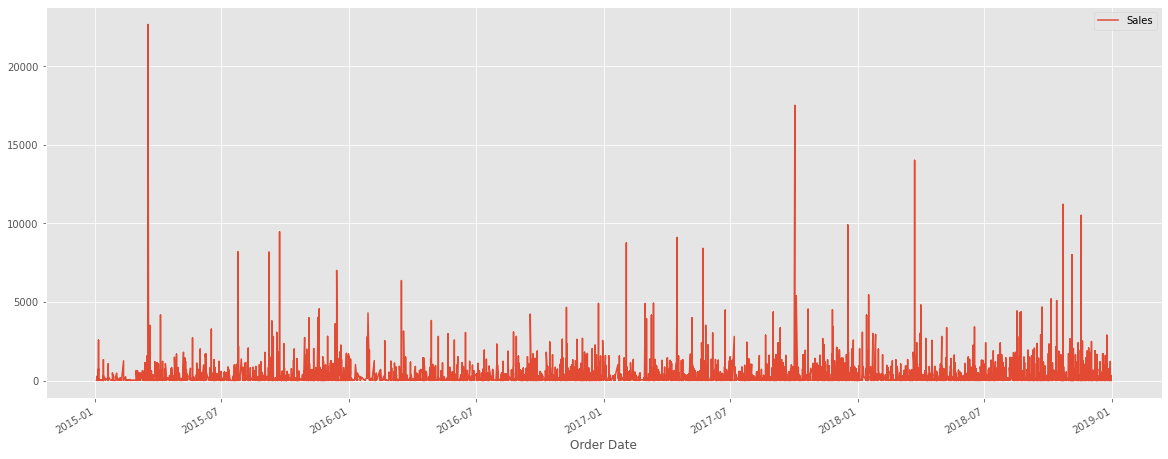

In [11]:
df_sales.plot();

# Check stationarity of dataset

## Adfuller Test

In [12]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
df_sales=df_sales.resample('D').mean()
df_sales = df_sales.interpolate(method='linear')
df_sales.head()

,Sales
Order Date,
2015-01-03,16.448000
2015-01-04,96.020000
2015-01-05,19.536000
2015-01-06,489.677778
2015-01-07,43.579000


In [14]:
adf_test(df_sales['Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -20.809459
p-value                    0.000000
# lags used                2.000000
# observations          1455.000000
critical value (1%)       -3.434852
critical value (5%)       -2.863528
critical value (10%)      -2.567829
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


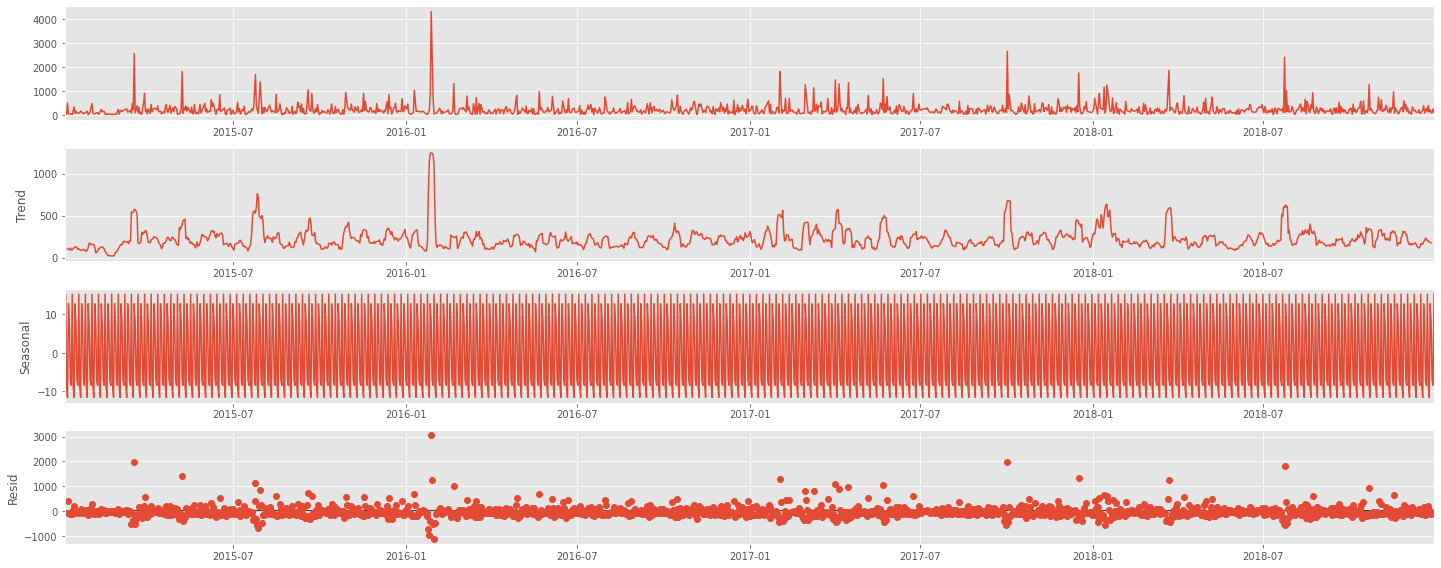

In [15]:
decomposition = seasonal_decompose(df_sales, model='additive') 
fig = decomposition.plot()
plt.show();

# Finding best p,d,q parameters for the datset

In [17]:
# Create a variable to hold the sales data
sales_data = df_sales['Sales']

# Find the best ARIMA parameters using the auto_arima function
model = auto_arima(sales_data, seasonal=True, m=12, error_action='ignore', suppress_warnings=True)

# Print the best model parameters
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1458
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -10183.049
Date:                Mon, 13 Mar 2023   AIC                          20376.098
Time:                        02:55:47   BIC                          20402.522
Sample:                    01-03-2015   HQIC                         20385.956
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    177.5538     13.964     12.715      0.000     150.185     204.922
ar.L1          0.2058      0.011     19.436      0.000       0.185       0.227
ar.L2          0.0572      0.026      2.216      0.0

In [18]:
stepwise_fit=auto_arima(df_sales['Sales'], start_p=0, start_q=0, max_p=3, max_q=3, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20446.218, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20380.345, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20389.274, Time=1.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21208.267, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=20379.334, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=20376.098, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=20378.097, Time=1.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20380.758, Time=1.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=20616.549, Time=0.60 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 5.715 seconds


# Applying the model to the dataset

In [19]:
from sklearn.model_selection import train_test_split

# Define the input data (Sales) and the train-test split ratio (e.g. 80% train, 20% test)
X = df_sales['Sales']
test_size = 0.2

# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=test_size, shuffle=False)

# Print the length of the train and test sets
print('Training set length:', len(X_train))
print('Testing set length:', len(X_test))

Training set length: 1166
Testing set length: 292


In [21]:
model=sm.tsa.arima.ARIMA(X_train, order=(3,0,0))

In [22]:
results=model.fit()

In [23]:
start=len(X_train)
end=len(X_train)+len(X_test)-1

In [24]:
predictions=results.predict(start, end).rename('ARIMA (3,0,0) Predictions')

In [25]:
predictions

2018-03-14    220.779380
2018-03-15    228.775673
2018-03-16    223.593577
2018-03-17    223.603620
2018-03-18    223.020644
                 ...    
2018-12-26    223.213847
2018-12-27    223.213847
2018-12-28    223.213847
2018-12-29    223.213847
2018-12-30    223.213847
Freq: D, Name: ARIMA (3,0,0) Predictions, Length: 292, dtype: float64

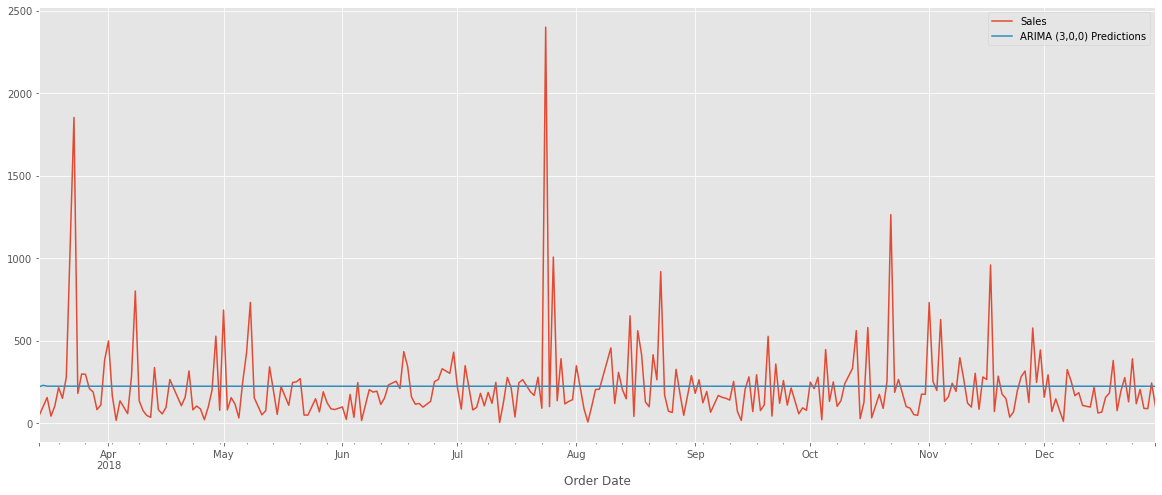

In [26]:
X_test.plot(legend=True)
predictions.plot(legend=True);

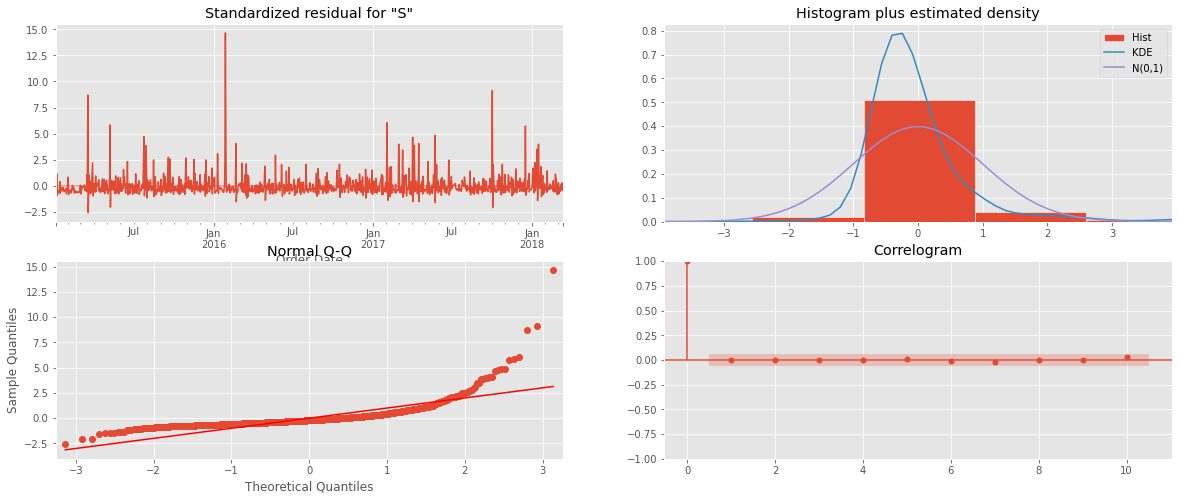

In [28]:
results.plot_diagnostics() 
plt.show()

In [29]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_sales,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:21194.720419683938
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20882.284066808126
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20882.284066808126
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:21077.55722633678
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 

In [31]:
mod = sm.tsa.statespace.SARIMAX(X_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) 
results = mod.fit()

In [32]:
predictions_2=results.predict(start, end).rename('SARIMAX (1, 1, 1)x(1, 1, 1, 12) Predictions')

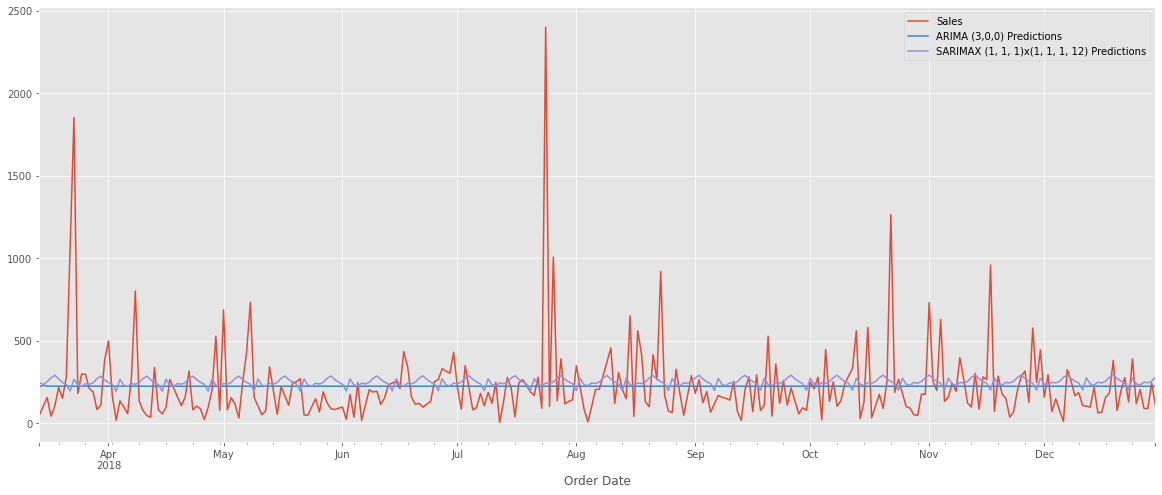

In [33]:
X_test.plot(legend=True)
predictions.plot(legend=True)
predictions_2.plot(legend=True);